# Housing Prices in Washington State
<br>
We were given the data containing housing data for Washington state from May 2014 to May 2015. We will be using the dataset to predict housing prices for houses within the state.

### 1. Import Packages

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm
from datetime import datetime

### 2. Exploratory Data Analysis

**2.1. Read Dataset**

In [4]:
#load data
houses=pd.read_csv(r'C:\Users\ADRIANO\Desktop\assessment\Lingaro\house.csv',parse_dates=['date'])

#data dimensions
houses.shape

#check data
houses.head(20)

#list columns
houses.columns

#list data types
houses.dtypes

(21613, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

**2.2 Univariate Analysis**

We can observe from the result below that the **ID** contains only **21,436** unique values out of 21,613. We will investigate this further later. We can also see low variability for the variables representing property grade, property view, waterfront view of the property, basement area,and the year of renovation. Many of the variables are right skewed. There are no missing values in our dataset.

In [6]:
#create a dataframe to check all univariates for each of the columns
univar=pd.DataFrame(pd.concat([houses.describe().transpose(),houses.nunique(),houses.apply(lambda x: [x.unique()]),houses.isna().sum(),houses.skew(),houses.kurt(),houses.var()],axis=1))
univar.columns=['count','mean','std_dev','min','1stQ','2ndQ','3rdQ','max','n_unique','unique_values','missing_values','skewness','kurtosis','variance']
#compute univariates for 'date' column
univar['count'].loc['date']=houses.date.count()
univar['min'].loc['date']=houses.date.min()
univar['max'].loc['date']=houses.date.max()
#univar.to_csv('univariates.csv')
univar

C:\Users\ADRIANO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
C:\Users\ADRIANO\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,count,mean,std_dev,min,1stQ,2ndQ,3rdQ,max,n_unique,unique_values,missing_values,skewness,kurtosis,variance
bathrooms,21613.0,2.114757e+00,7.701632e-01,0,1.750000e+00,2.250000e+00,2.500000e+00,8,30,"[[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2....",0,0.511108,1.279902,5.931513e-01
bedrooms,21613.0,3.370842e+00,9.300618e-01,0,3.000000e+00,3.000000e+00,4.000000e+00,33,13,"[[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]]",0,1.974300,49.063653,8.650150e-01
condition,21613.0,3.409430e+00,6.507430e-01,1,3.000000e+00,3.000000e+00,4.000000e+00,5,5,"[[3, 5, 4, 1, 2]]",0,1.032805,0.525764,4.234665e-01
date,21613.0,NaN,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,2015-05-27 00:00:00,372,"[[2014-10-13 00:00:00, 2014-12-09 00:00:00, 20...",0,NaN,NaN,NaN
floors,21613.0,1.494309e+00,5.399889e-01,1,1.000000e+00,1.500000e+00,2.000000e+00,3.5,6,"[[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]]",0,0.616177,-0.484723,2.915880e-01
grade,21613.0,7.656873e+00,1.175459e+00,1,7.000000e+00,7.000000e+00,8.000000e+00,13,12,"[[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]]",0,0.771103,1.190932,1.381703e+00
id,21613.0,4.580302e+09,2.876566e+09,1.0001e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.9e+09,21436,"[[7129300520, 6414100192, 5631500400, 24872008...",0,0.243329,-1.260542,8.274629e+18
lat,21613.0,4.756005e+01,1.385637e-01,47.1559,4.747100e+01,4.757180e+01,4.767800e+01,47.7776,5034,"[[47.5112, 47.721000000000004, 47.7379, 47.520...",0,-0.485270,-0.676313,1.919990e-02
long,21613.0,-1.222139e+02,1.408283e-01,-122.519,-1.223280e+02,-1.222300e+02,-1.221250e+02,-121.315,752,"[[-122.257, -122.319, -122.23299999999999, -12...",0,0.885053,1.049501,1.983262e-02
price,21613.0,5.400881e+05,3.671272e+05,75000,3.219500e+05,4.500000e+05,6.450000e+05,7.7e+06,4028,"[[221900.0, 538000.0, 180000.0, 604000.0, 5100...",0,4.024069,34.585540,1.347824e+11


**2.3 Data Quality**

**2.3.1 Duplicate values**

**ID**
<br>
It can be seen from the univariates result that our unique identifier, ID has **21,613 observations** but only **21,436 unique values** . We can see from below that there are **383 duplicates**  due to re-pricing of the property. Hence, we will be taking the latest price for the said property.

In [7]:
houses.sort_values(by=['id','date'],inplace=True)
dups=houses['id'].duplicated(keep='first')
houses=houses[~dups]
houses.shape
houses.id.nunique()

(21436, 21)

21436

**2.3.2 Drop variables**
<br>
We will be dropping variables we will not be considering in our model. Zipcodes converted to 24 cities within Washington is a possible predictor but it may highly complicate the model.

In [9]:
#drop variables that does not make sense to be a predictor
house=houses.drop(['date','id','lat','long','zipcode'],axis=1)
house.shape

(21436, 16)

**2.4. Correlation Analysis**
<br>
To be able to see initial relationship of Price against other possible predictors, we will be looking at the correlation of each of the variables as seen from the plot below. 

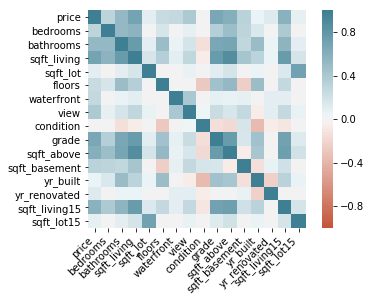

In [10]:
#get correlation of all variables
corr = house.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#house.corr().to_csv('correlation.csv')


**2.5 Variable Distributions**
<br>
Below are the histograms of the predictor variables. It can be seen that majority are positively skewed. We also listed down all predictor variables grouped by positive/negative skewness and its correlation with Price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x085A1990>,
      dtype=object)

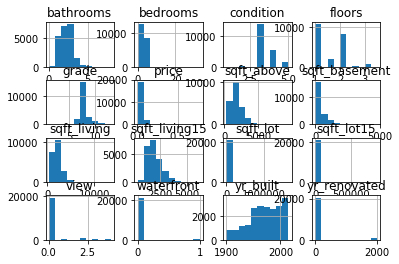

In [11]:
#histogram of all variables
house.hist()

#### Positively Skewed with Very Low  to Weak Correlation to Price
Very low correlated variables have a correlation coefficient of less than 0.3 while Weakly correlated variables have a correlation  coefficient 0.3-0.5.
>**Bedrooms** _(Corr:0.31)_ -indicates the number of bedrooms in the property.
<br>
> **Condition** _(Corr:0.04)_ -indicates property condition using a 1-5 rating.
<br>
>**Floors** _(Corr:0.26)_ -indicates number of floors of the property. Half floors indicate additional space referred to as a 'partial floor'.
<br>
> **Sqft_Lot** _(Corr:0.09)_ -lot area of property. This variable is **highly skewed**.
<br>
>**Sqft_Basement** _(Corr:0.32)_- area of the basement
<br>
>**View** _(Corr:0.40)_- quality of the view
<br>
>**Waterfront** _(Corr:0.27)_- indicates whether the property is facing water. This variable is **highly skewed**.
<br>
>**Yr_Renovated**_(Corr:0.13)_- year the property was renovated 

#### Positively Skewed with Moderate to Strong Correlation to Price
These are variables whose correlation coefficient ranges from 0.5-0.7. Strongly correlated variables have a correlation coefficient of 0.7-0.9.
>**Bathrooms** _(Corr:0.53)_ -indicates the number of bathrooms in the property. This is defined using the 4-piece bathroom definition- a restroom has four plumbing fixtures, usually a sink, a toilet, and two other fixtures. This means a 3/4 bath (0.75) indicates a restroom with three fixtures while a 1.75 bathroom indicates two restrooms- one with a complete set and another with a 3/4 bath. This variable is **highly skewed**.
<br>
>**Grade** _(Corr:0.67)_ - refers to property grade which is an evaluation on the level of craftsmanship and the quality of construction materials of the property.
<br>
>**Sqft_above** _(Corr:0.61)_ -refers to living area above ground level
<br>
>**Sqft_Living** _(Corr:0.70)_ -refers to the area of the living space.

#### Negatively Skewed Variable
>**Yr_Built** _(Corr:0.05)_ - year the property was built 

### **2.6. Variable Transformation and Creation**

#### 2.6.1 Transformation of Continuous Predictors
We will be needing to transform a couple of predictors to correct it and for easier interpretation in case it becomes significant.

**Living Area** *(sqft_living)*

Skewness: -0.03708222029718243


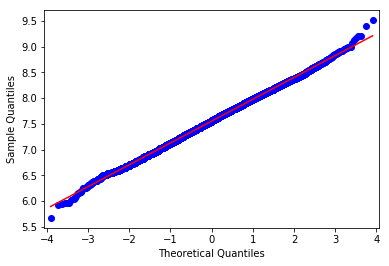

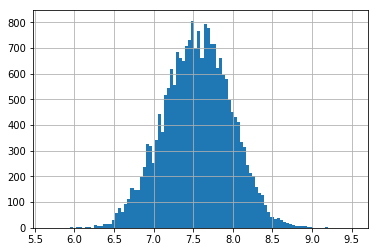

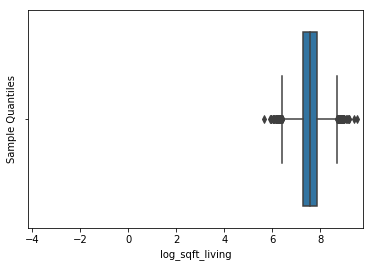

In [19]:
#log transformation of sqft living
house['log_sqft_living']=np.log(house.sqft_living)

#distribution
house.log_sqft_living.hist(bins=100)

#check for skewness
print('Skewness:',house.log_sqft_living.skew())

#normality check
qqplot(house.log_sqft_living,line='s')

#boxplots
sns.boxplot(x=house['log_sqft_living'])

**Area above** *(sqft_above)*

Skewness: 0.2504555698059799


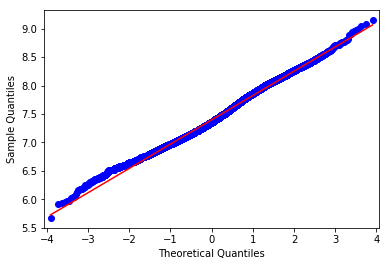

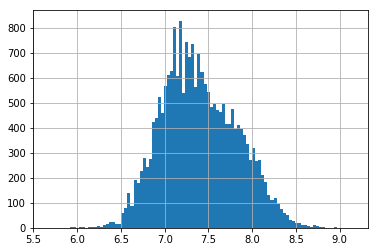

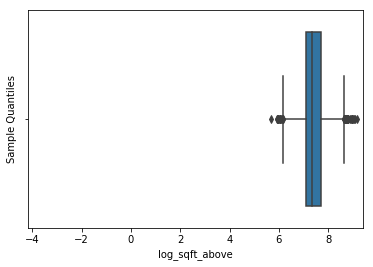

In [20]:
#log transformation of sqft above
house['log_sqft_above']=np.log(house.sqft_above)

#check for skewness
print('Skewness:',house.log_sqft_above.skew())

#histogram
house.log_sqft_above.hist(bins=100)

#normality check
qqplot(house.log_sqft_above,line='s')

#boxplots
sns.boxplot(x=house['log_sqft_above'])

**Lot Area** *(sqft_lot)*
<br>
We can see below that even though we have performed log transformation on Lot Area, the qqplot is not as smooth as the previous variables.

Skewness: 0.9599853177983128


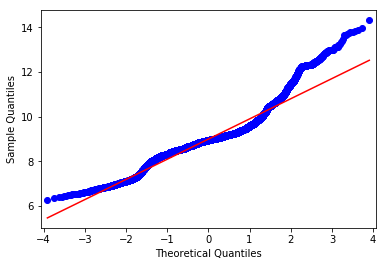

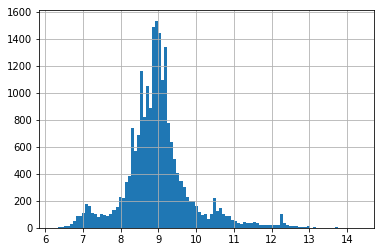

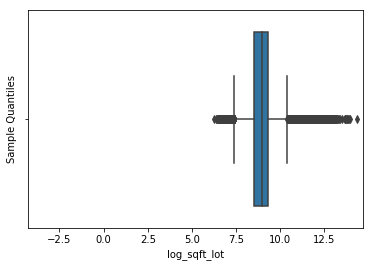

In [22]:
#log transformation of sqft lot
house['log_sqft_lot']=np.log(house.sqft_lot)

#check for skewness
print('Skewness:',house.log_sqft_lot.skew())
house.log_sqft_lot.hist(bins=100)

#normality check
qqplot(house.log_sqft_lot,line='s')

#boxplots
sns.boxplot(x=house['log_sqft_lot'])

#### 2.6.2 Transformation of the Dependent Variable
**Price** *(price)*
<br>
-indicates the price of the real estate property. This is our dependent variable.
<br>
Price is  **_highly skewed right_** as seen on the plot below. We might need to transform the dependent variable due to its varied values. This is also to control possibilities of outliers in the data. We will be using _log-transformation_ to transform it.

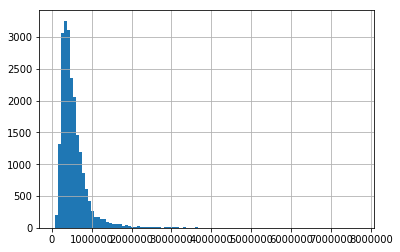

In [12]:
#distribution of price
house.price.hist(bins=100)

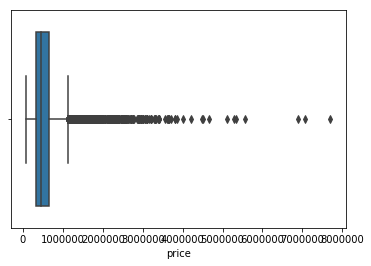

In [13]:
#outlier checking
sns.boxplot(x=house['price'])

In [31]:
#IQR
#Q1_price=house.price.quantile(0.25)
#Q3_price=house.price.quantile(0.75)
#IQR_price=Q3_price-Q1_price
#print(IQR_price)
#create df of outliers
#price_outliers=house[(house.price<(Q1_price-(1.5*IQR_price)))|(house.price>(Q3_price+(1.5*IQR_price)))]
#price_outliers

Skewness: 0.4280784583487857


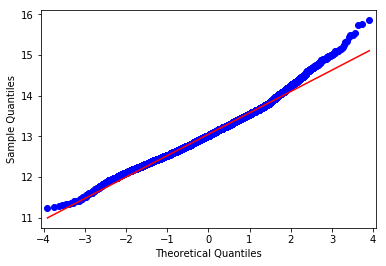

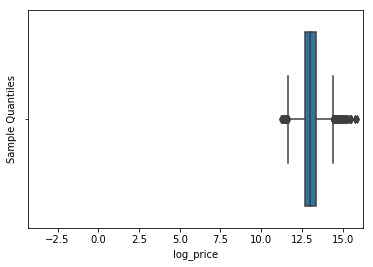

In [15]:
#log transformation of price
house['log_price']=np.log(house.price)

#check for skewness
print('Skewness:', house.log_price.skew())

#normality check
qqplot(house.log_price,line='s')

#boxplots
sns.boxplot(x=house['log_price'])

In [16]:
#Interquartile Range
Q1_log_price=house.log_price.quantile(0.25)
Q3_log_price=house.log_price.quantile(0.75)
IQR_log_price=Q3_log_price-Q1_log_price
print(IQR_log_price)
#create df of outliers
log_price_outliers=house[(house.log_price<(Q1_log_price-(1.5*IQR_log_price)))|(house.log_price>(Q3_log_price+(1.5*IQR_log_price)))]
log_price_outliers.shape

0.6942330773525143


(332, 17)

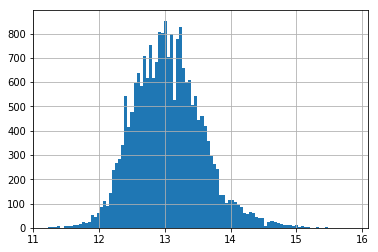

In [17]:
house.log_price.hist(bins=100)

**3.3 Correlation of new variables with new dependent variable** 
<br>
Correlation against the transformed dependent variable, ***log_price***

In [23]:
#check correlation
house.corr()['log_price']

price              0.891488
bedrooms           0.344192
bathrooms          0.551080
sqft_living        0.695413
sqft_lot           0.099133
floors             0.310233
waterfront         0.175137
view               0.346374
condition          0.038241
grade              0.703948
sqft_above         0.602016
sqft_basement      0.316406
yr_built           0.079735
yr_renovated       0.115111
sqft_living15      0.619017
sqft_lot15         0.091320
log_price          1.000000
log_sqft_living    0.674955
log_sqft_above     0.586466
log_sqft_lot       0.138032
Name: log_price, dtype: float64

**2.6.5. Creation of Dummy Variables**

**Renovated** <br>
Year the property was renovated *(yr_renovated)* column provides us information if the property underwent a renovation. Suppose that the value is zero, it means it has not been renovated yet.

In [24]:
#yr_renovated
house.loc[house['yr_renovated']==0,'renovated']=0
house.loc[house['yr_renovated']!=0,'renovated']=1

**With Basement** <br>
Basement area *(sqft_basement)* provides us information if the property basement. Suppose that the value is zero, it means it does not have a basement

In [25]:
#with basement
house.loc[house['sqft_basement']==0,'with_basement']=0
house.loc[house['sqft_basement']!=0,'with_basement']=1

**Grades 1-13** <br>
Property grade *(grade)* will be split into multiple dummy variables since it has 13 values. Since we currently do not have any property with a grade of *2*, we will need to create it on the next section.

In [26]:
#grade
grades=pd.get_dummies(house['grade'])
grades.columns=['gr_1','gr_3','gr_4','gr_5','gr_6','gr_7','gr_8','gr_9','gr_10','gr_11','gr_12','gr_13']
#grade 2 is missing, if we put grade as predictor, gr2 will be the 'grade' if none suffice

**Property Conditions** <br>
Property condition *(condition)* will be split into multiple dummy variables since it has 5 values (1-5). 

In [27]:
#condition
conditions=pd.get_dummies(house['condition'])
conditions.columns=['con_1','con_2','con_3','con_4','con_5']
#condition is complete, condition 1 is base if none suffice

**Property Views** <br>
Property views *(view)* will be split into multiple dummy variables since it has 5 values (0-4). A value of zero in this variable means the property has no view in its vicinity. 

In [28]:
#view
views=pd.get_dummies(house['view'])
views.columns=['view_0','view_1','view_2','view_3','view_4']
#view 0 is base if none suffice

In [29]:
#append the created dummy variables to our dataset
house=pd.concat([house,grades,conditions,views],axis=1)

**2.6.6 New Variables**

**Years since renovated**
<br>
We will be computing how much time has passed since the renovation of the property.

In [31]:
#Years since renovated
house['yrs_since_renovated']=int(datetime.now().year)-house.yr_renovated

**Years since built**
<br>
We will be computing how much time has passed since the property was built.

In [32]:
#Years since built
house['yrs_since_built']=int(datetime.now().year)-house.yr_built

**Grade 2**
<br>
We will be creating a variable for property grade 2. We will see if this will be a significant variable even though it lacks variability.

In [33]:
house['gr_2']=0

**2.6.7 Interaction Variables**

**Since Renovated**
<br>
The variable shall be derived from the dummy variable *Renovated* and the *Year since renovated*.

In [34]:
#since renovated
house['since_renovated']=house.yrs_since_renovated*house.renovated

**Bedrooms-Living Area**
<br>
This variable shall be derived from Living Area and Bedrooms.

In [125]:
#living-bedroom
house['sqft_living_bedrooms']=house.sqft_living*house.bedrooms

### **2.7 Bivariate Scatterplots**

In [35]:
house.shape

(21436, 48)

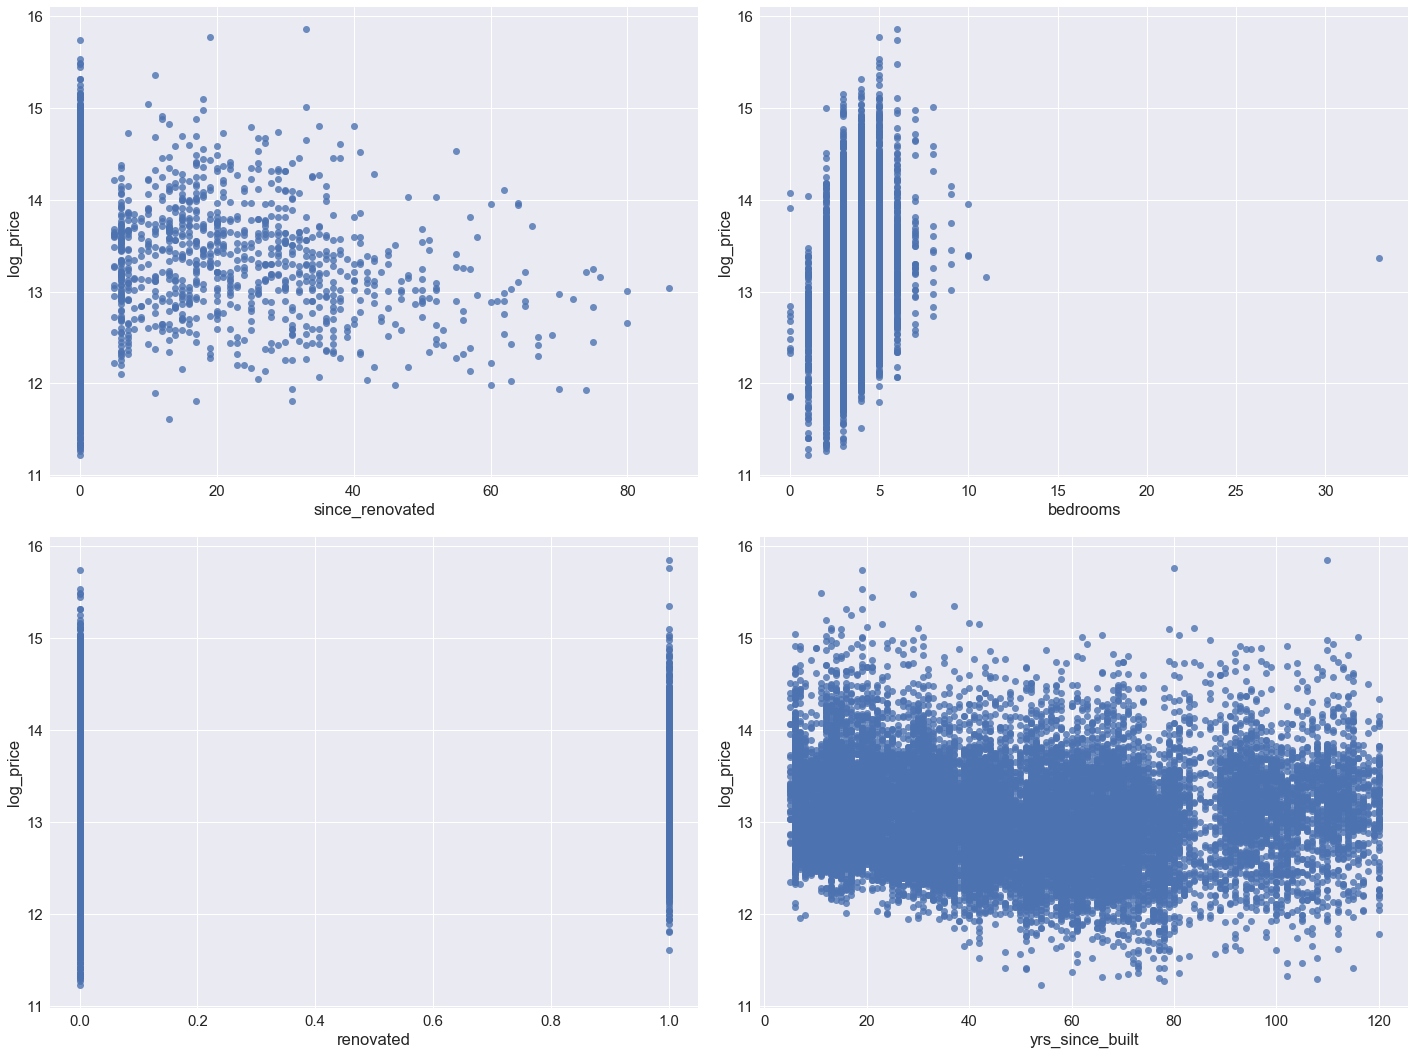

In [36]:
#Plot possible predictors
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1=fig.add_subplot(221)
sns.regplot(x='since_renovated',y='log_price',data=house[['since_renovated','log_price']],fit_reg=False)

fig2=fig.add_subplot(222)
sns.regplot(x='bedrooms',y='log_price',data=house[['bedrooms','log_price']],fit_reg=False)

fig3=fig.add_subplot(223)
sns.regplot(x='renovated',y='log_price',data=house[['renovated','log_price']],fit_reg=False)

fig4=fig.add_subplot(224)
sns.regplot(x='yrs_since_built',y='log_price',data=house[['yrs_since_built','log_price']],fit_reg=False)

plt.tight_layout(); plt.show()

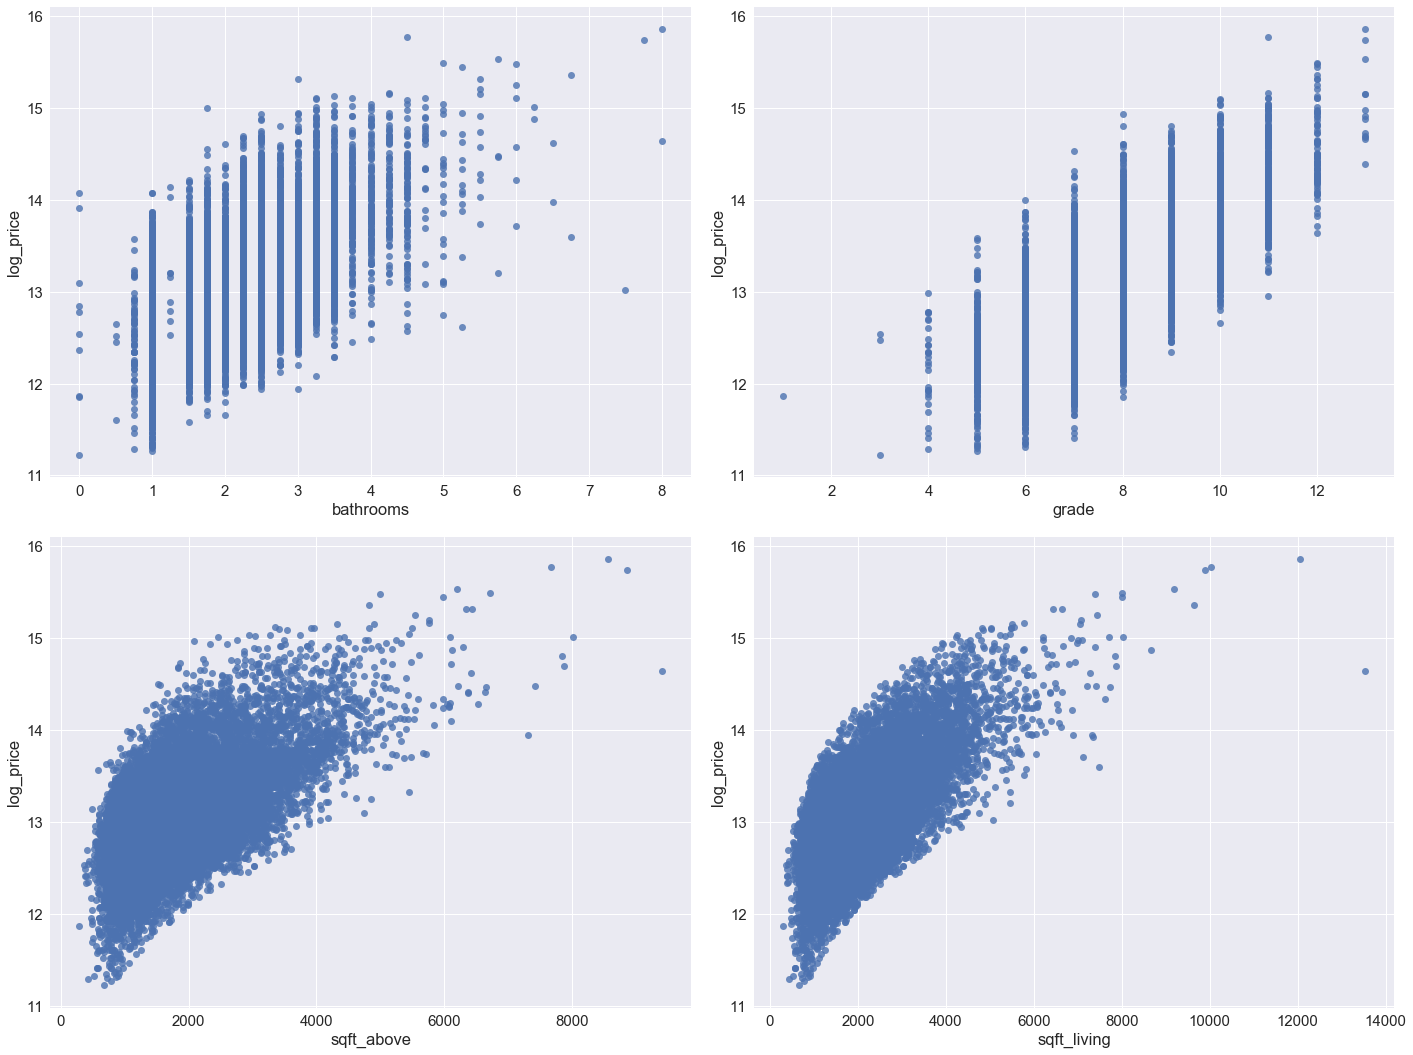

In [37]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

fig1=fig.add_subplot(221)
sns.regplot(x='bathrooms',y='log_price',data=house[['bathrooms','log_price']],fit_reg=False)

fig2=fig.add_subplot(222)
sns.regplot(x='grade',y='log_price',data=house[['grade','log_price']],fit_reg=False)

fig3=fig.add_subplot(223)
sns.regplot(x='sqft_above',y='log_price',data=house[['sqft_above','log_price']],fit_reg=False)

fig4=fig.add_subplot(224)
sns.regplot(x='sqft_living',y='log_price',data=house[['sqft_living','log_price']],fit_reg=False)

plt.tight_layout(); plt.show()

#### 2.8 Data Summary ####
The data is composed of 21,486 properties in the state of Washington. The properties are characterized by 21 attributes:
3  Location attributes _(lat,long,zipcode)_; 1  identifier _(id)_, and 16 property related attributes.

We have log-transformed the area variables and price to be able to cater the varied observations and control possible outliers.
Number of bathrooms, property grade, living area, and living area above ground level all indicate a linear relationship with price.


### 3. Methodology
<br>
We will be exploring 2 ways to predict the prices- through **Ordinary Least Squares Regression** and **Gradient Boosting**.

*OLS Regression* is the most common parametric modeling technique which is used to determine relationship between a continuous variable and its predictors. The method heavily relies on the fulfillment of its assumptions. We wanted to use OLS Regression because of its interpretability. 

*Gradient Boosting* is one of the more powerful techniques to build predictive models. Boosting methods generally transform weak learners to stronger ones. Unlike OLS regression, gradient boosting is not reliant on assumptions. We wanted to use the method to see further improvements in prediction.

### **3.1 Ordinary Least Squares Regression** ###
<br>
Given that our dependent variable underwent *Box-Cox Transformation* using natural logarithms, we will be predicting not actual units of prices but the percentage point increase in price.

**3.1.1 STATSMODELS**
<br>
We will be using the *statsmodels* package to be able to easily see the p-values of the predictors of our model. This is an essential process since we will be using backward elimination to select our model features.

The features we have selected for the model:
> **Living Area (log transformed)**
<br>
> **Number of Bathrooms**
<br>
> **Years Since Built**
<br>
> **Indicator variables for Property Grade**
<br>
> **Indicator variables for Property View**

In [64]:
feature_cols=['log_sqft_living','bathrooms',
       'yrs_since_built',
       'gr_3', 'gr_4', 'gr_5', 'gr_6','gr_8', 'gr_9', 'gr_10',
       'gr_11', 'gr_12', 'gr_13','view_1', 'view_2', 'view_3', 'view_4']

#select independent variables
x_vars=house[feature_cols]
y_vars=house['log_price']

#add constant
x_vars_cons=sm.add_constant(x_vars)

In [65]:
stats_ols=sm.OLS(y_vars,x_vars_cons).fit()
stats_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2242.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:17:13   Log-Likelihood:                -5722.6
No. Observations:               21436   AIC:                         1.148e+04
Df Residuals:                   21418   BIC:                         1.162e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.0462      0.063    158.658      0.000       9.922      10.170
log_sqft_living     0.3092      0.009     33.507      0.000       0.291       0.327
bathrooms           0.0974      0.005     20.334      0.000       0.088       0.107
yrs_since_built     0.0057   9.14e-05     61.970      0.000       0.005       0.006
gr_3               -0.3870      0.183     -2.118      0.034      -0.745      -0.029
gr_4               -0.4232      0.059     -7.136      0.000      -0.539      -0.307
gr_5               -0.4389      0.022    -20.409      0.000      -0.481      -0.397
gr_6               -0.2462      0.008    -29.031      0.000      -0.263      -0.230
gr_8                0.2529      0.006     43.132      0.000       0.241       0.264
gr_9                0.5176      0.008     60.923      0.000       0.501       0.534
gr_10               0.7247      0.012     61.182      0.000       0.702       0.748
gr_11               0.9222      0.018     50.405      0.000       0.886       0.958
gr_12               1.1343      0.035     32.038      0.000       1.065       1.204
gr_13               1.3490      0.089     15.171      0.000       1.175       1.523
view_1              0.1815      0.018     10.292      0.000       0.147       0.216
view_2              0.1071      0.011     10.042      0.000       0.086       0.128
view_3              0.1510      0.015     10.390      0.000       0.122       0.179
view_4              0.4131      0.018     22.434      0.000       0.377       0.449
==============================================================================
Omnibus:                       62.227   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.771
Skew:                          -0.107   Prob(JB):                     5.22e-15
Kurtosis:                       3.166   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.1.2 Linear Regression Assumptions**

**Multicollinearity**
<br> 
Multicolliearity is a state of having correlated variables in the model. We wanted to avoid multicollinearity since it will just be duplicating information which was already provided by any one of the correlated variables. We can see from the Variance Inflation Factor (VIF) table below that no variable has a score of 10 or higher. This is an indication of no multicollinearity.

In [66]:
#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_vars_cons.values, i) for i in range(x_vars_cons.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=feature_cols).T

,log_sqft_living,bathrooms,yrs_since_built,gr_3,gr_4,gr_5,gr_6,gr_8,gr_9,gr_10,gr_11,gr_12,gr_13,view_1,view_2,view_3,view_4
vif,3.293785,2.915468,1.548522,1.002126,1.019068,1.070713,1.301625,1.492342,1.653169,1.502808,1.301636,1.111664,1.027784,1.01437,1.044675,1.045633,1.05628


**Linear Relationship between Dependent and Independent variables**
<br>
There should be a linear relationship between Price and its predictors. We can clearly see a linear relationship between Price and its predictors from the plot below.

Text(0.5,1,'Observed vs. Predicted Values')

[Text(0,0.5,'Observed'), Text(0.5,0,'Predicted')]

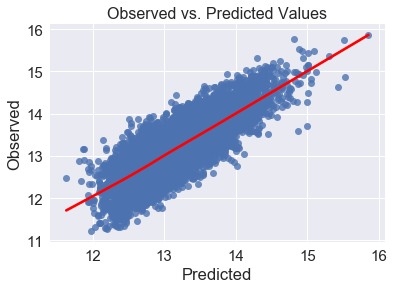

In [94]:
#linearity assumption
fitted_vals=stats_ols.predict()
residuals=stats_ols.resid

fig, ax = plt.subplots()
    
sns.regplot(x=fitted_vals, y=y_vars, lowess=True, line_kws={'color': 'red'})
ax.set_title('Observed vs. Predicted Values', fontsize=16)
ax.set(xlabel='Predicted', ylabel='Observed')

**Normality of Error**
<br>
Residuals of the model should follow a normal distribution with mean of zero. We can say that we have passed the assumption since the mean of the residuals is very close to zero and as seen in the QQ plot.

In [88]:
#zero mean residuals
print('Mean of Residuals:',stats_ols.resid.mean())

Mean of Residuals: 8.800068136200143e-14


0.9980275464336265

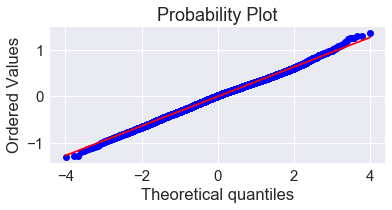

In [69]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)
r**2

**Homoskedasticity**
<br>
Homoskedasticity is where the error term is the same across values of the independent variables. We will be using a scatterplot to determine if the distribution of residuals and the fitted values shows any pattern. We will also be performing Breusch Pagan Test to verify our finding.

<br>
Although the residuals seem random from the graph, it also seems to be clustering around zero. The BP-Test verified that there is the presence of heteroskedasicity in our model.

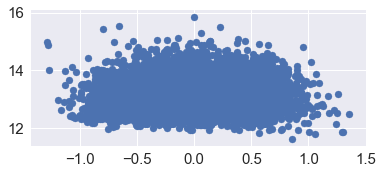

In [87]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residuals, fitted_vals)

In [67]:
#homoskedasticity
from statsmodels.stats import diagnostic
_,p_val,__,f_val=diagnostic.het_breuschpagan(stats_ols.resid,x_vars_cons)
p_val,f_val

(1.6439302293869245e-54, 6.270006391650576e-55)

**No Serial Autocorrelation**
<br>
Autocorrelation occurs when the residuals are dependent of each other. From the *STATSMODELS* summary, the Durbin-Watson Test is the test we used to check Serial Autocorrelation. Autocorrelation is present in our model since the value for DW Test not equal to 2.

**Linear Regression Summary**
<br>
Out of the 5 assumptions, the OLS model passed 3 assumptions: Linearity, Normality in Error, and No Multicollinerity. Homoskedasticity can possibly resolved by transformation of other variables. Autocorrelation can possibly be resolved through inclusion of lags in the dependent or independent variables

**3.1.3 Cross Validation via SKLEARN**

We will now use the same features in the OLS model developed through *STATSMODELS* package in creating a linear regression model using *SKLEARN* for cross-validation.

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_vars.values, y_vars.values, test_size=0.2, random_state=20)

In [71]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17148, 17), (4288, 17), (17148,), (4288,))

In [72]:
ols=LinearRegression()
ols.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
y_pred=ols.predict(x_test)

In [104]:
list(zip(feature_cols,ols.coef_))
print("Model Intercept:",ols.intercept_)

[('log_sqft_living', 0.30743196178743365),
 ('bathrooms', 0.09805538904926314),
 ('yrs_since_built', 0.005653943934469205),
 ('gr_3', -0.38400467547390865),
 ('gr_4', -0.39436121305547944),
 ('gr_5', -0.4593922083799962),
 ('gr_6', -0.24179761043642936),
 ('gr_8', 0.2563086765923141),
 ('gr_9', 0.5220400990647187),
 ('gr_10', 0.7205900589906844),
 ('gr_11', 0.9305620777677589),
 ('gr_12', 1.101204891112733),
 ('gr_13', 1.3246665332842478),
 ('view_1', 0.18396209226008403),
 ('view_2', 0.10820388765905804),
 ('view_3', 0.15373372574979946),
 ('view_4', 0.4039421619791102)]

Model Intercept: 10.055361484722741


In [106]:
#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#MAE
print('MAE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,y_pred))

#model score
print('Training Model Score:',ols.score(x_train,y_train))
print('Test Model Score:',ols.score(x_test,y_test))

RMSE: 0.3185490855949968
MAE: 0.5038040895530129
MSE: 0.10147351993340858
Training Model Score: 0.6406831294054889
Test Model Score: 0.637877009683692


**3.1.4 Model Interpretation**
Our regression model has a Root Mean Square Error of **0.32**. Our training and test model score (R-Squared) indicates that *64% of the variation in *log(price)* can be explained by the model. Listed below are the interpretations of each of the variables to house prices.

> **Living Area** - a percentage point (1%) increase in living area *increases* the price of the house by **30.7%**
<br>
> **Years since Built** - as the house gets older by a year, its price *increases* by **5.6%**
<br>
> **Property View**- a view in the property generally **increases** its price. A property with only 1 view increases the price by **18%** while those having 2,3,and 4 views provide **11%**,**15%**, and **40%**, respectively.<br>
> **Property Grades** - different property grades have different effects on house prices. <br>
>> Houses which has property grades 3,4,5 and 6 provide a **decrease** in house price by **38%**,**39%**,**46%** and **24%**, respectively while those with property grdes of 8,9,10,11,12, and 13 provide an **increase** in house price by **26%**,**52%**,**72%**,**93%**,**110%**, and **132%** respectively.
<br>




### Gradient Boosting Machines
<br>
The assumption of Multicollinearity prohibits the use of highly correlated predictors in our linear regression model. One of the advantages of Gradient Boosting Machines is that it is not relying on assumptions. This means we can use highly correlated predictors in the model.
<br>
The features we have selected for the model:
> **Living Area** (in square feet) <br>
> **Number of Bathrooms**<br>
> **Years since built**<br>
> **Property Grade**<br>
> **Waterfront within property**



In [84]:
new_feature_cols=['sqft_living','bathrooms',
       'yrs_since_built','grade','waterfront']
                 
#feature_cols=['grade']
x_vars2=house[new_feature_cols]
y_vars2=house['price']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_vars2.values, y_vars2.values, test_size=0.2, random_state=20)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=100,learning_rate=0.08,subsample=0.8,random_state=20) 
gbrt.fit(x_train2, y_train2) 
y_pred_gb=gbrt.predict(x_test2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.08, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=20,
             subsample=0.8, verbose=0, warm_start=False)

In [90]:
print("Feature Importances" )
print(list(zip(new_feature_cols,gbrt.feature_importances_ )))
print #Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher.
print("R-squared for Train: %.2f" %gbrt.score(x_train2, y_train2))
print("R-squared for Test: %.2f" %gbrt.score(x_test2, y_test2) )


Feature Importances
[('sqft_living', 0.2951076003151016), ('bathrooms', 0.15850933433956452), ('yrs_since_built', 0.2651919591847698), ('grade', 0.21555002774647966), ('waterfront', 0.06564107841408456)]


<function print>

R-squared for Train: 0.75
R-squared for Test: 0.73


**Model Interpretation**
<br>
Based on our cross validation, our model explains **73%** of the variation in price. This is a 9-percentage-point increase compared to our linear regression model. **Living area, Years since built, and Property grade** are the most important features in the model.

## 4. Conclusion

The OLS model greatly illustrates the relationship of price with our selected features. We can easily explain the marginal effect of each of the predictors to price percentage. On the other hand, our GBM model may lack interpretability but it clearly  outperforms our OLS model in terms of model prediction. GBM model explains **73%** of the variation in price compared to the OLS model which only explains **64%**. However, we should take note that we can still improve our regression model by fulfilling all assumptions. <br>

The model we will be selecting will greatly depend on how are we going to use the model. If we will be very much concerned on the interpretability over prediction accuracy, we will be choosing the linear regression model, but since we are aiming to have a model with higher predictive power over interpretability, we are choosing the GBM model.

## 5. Further Improvements
There are several ways to improve our models:
> **1. Optimize Parameters of the GBM Model** - we could use **GridSearchCV** to optimize selected parameters in the GBM model. This is computationally intensive but could improve results.<br>
> **2. Use other Variable Transformations in our OLS model** - we could use other *Box-Cox Transformation* which will allow us to satisfy all of the regression assumptions. Variable transformations may be applied to the dependent or to the feature variables. <br>
> **3. Use lags to satisfy Autocorrelation assumption**- using the same OLS model, we could perform include lags in order to satisfy the autocorrelation assumption. <br>
> **4. Try other techniques** - trying out other techniques such as XGBoost and Robust Regression may yield better results.